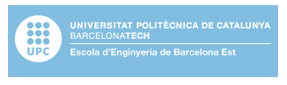

# PROYECTO 3 DE APRENDIZAJE BIOESTADÍSTICO

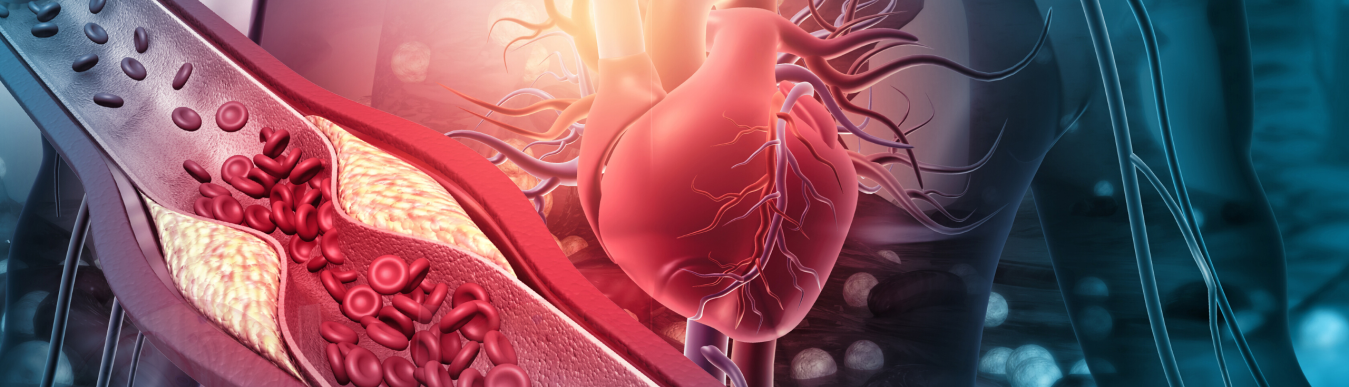

##### **Autores:** Marta Borràs Duarte, Iker Del Campo Merlos i Carla Hurtado Abad

##### **Profesor:** Luis Eduardo Mujica Delgado

##### **Fecha:** 17 de junio, 2023


---



# Índice

**1.- Introducción y objetivos**

*   1.1.- La variable a predecir
*   1.2.- Modelo de clasificación mejor

**2.- Importar datos**

*   2.1.- Inicialización
*   2.2.- Importación de datos y verificación
*   2.3.- Análisis explorativo descriptivo inicial de los datos

**3.- Importar el mejor clasificador del Proyecto 2**

*   3.1.- Preprocesado de datos de entrenamiento
*   3.1.1.- Importación de datos
*   3.1.2.- División de datos
*   3.1.3.- Escalamiento de datos
*   3.2.- Optimización de hiperparámetros
*   3.3.- Entrenamiento del modelo
*   3.4.- Evaluación resultados de entrenamiento y test
*   3.4.1.- Resultados de entrenamiento
*   3.4.2.- Resultados de test
*   3.5.- Remuestreo

**4.- K-means**

*   4.1.- Regla del codo para encontrar el número de clústers óptimo
*   4.2.- Entrenamineto de un modelo con K-means

**5.- Aprendizaje con PCA y SVC del proyecto 2**
*   5.1.- Buscar mejor número de componentes
*   5.2.- Re-entrenamiento del SVC del Proyecto 2 con PCA
*   5.3.- Evaluación resultados de entrenamiento y test
*   5.3.1.- Resultados de entrenamiento
*   5.3.2.- Resultados de test
*   5.4.- Remuestreo

**6.- Conclusiones**













# 1.- Introducción y objetivos


El presente trabajo constituye la tercera etapa del proyecto de la asignatura de Aprendizaje Bioestadístico, el cual consiste en predecir las complicaciones debidas al Infarto de Miocardio (IM), a partir de información clínica en el momento de admisión y al tercer día del período de hospitalización.

El objetivo de este tercer trabajo es predecir la probabilidad de padecer un infarto de miocardio, por medio de métodos de Aprendizaje No Supervisado (Unsupervised Machine Learning).

La base de datos con la que se va a trabajar es la 'Myocardial infraction complications', creada en el año 2020, y que contiene registros de 1700 pacientes y 124 atributos.





### 1.1.- La varaible a predecir

En esta actividad, la variable a estudiar es ZSN (insuficiencia cardíaca), que corresponde a la variable 121 del dataset.

La insuficiencia cardíaca es una afección por la que el corazón tiene dificultades para bombear la sangre a través del cuerpo. Cuando esto sucede, la sangre a menudo retrocede y el líquido se puede acumular en los pulmones, lo que causa falta de aliento. Esta condición puede ser causada por afecciones cardíacas, como las arterias estrechadas en el corazón (enfermedad de las arterias coronarias) o la presión arterial alta, dejan progresivamente el corazón demasiado débil o rígido como para llenarse y bombear sangre de forma apropiada. Generalmente se presenta en las personas de 65 años de edad años o más. También se llama ICC.


### 1.2.- El modelo de clasificación mejor del Proyecto 2

Analizando los resultados obtenidos en el proyecto anterior, se puede concluir que el mejor clasificador seria el modelo 3 SVM. Puesto que tiene los mayores valores en todos los indicadores en comparación al resto. Aún así, este modelo no consigue ser un buen clasificador para la variable ZSN; la accuracy obtenida se encuentra por debajo del 90%, que es el valor mínimo para muchas aplicaciones reales, especialmente en Medicina Computacional.

Combinación 3: AGE, ZSN_A, OTEK_LANC, SEX, ALT_BLOOD
Con el clasificador SVM

En este proyecto, se volverá a entrenar el modelo. Seguidamente, se probaran métodos de Aprendizaje No Supervisado, concretamente PCA, seguido del reentrenamiento del SVC del Proyecto 2, para comparar qué método permite obtener los mejores resultados.

# 2.- Importar datos

En este apartado se procede realizar un estudio previo de los datos clínicos del dataset con los que se va a trabajar, y se escogen las variables más adecuadas para efectuar la predicción de la variable ZSN.

### 2.1.- Inicialización

En primer lugar, se monta el Google Drive en el Colab y se le da acceso.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Primeramente, se procede a importar los siguientes módulos:


*   **Pandas**: Es una librería de Python especializada en la manipulación y el análisis de datos. Ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales, es como el Excel de Python.
*   **NumPy**: Es una biblioteca para el lenguaje de programación Python que da soporte para crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel para operar con ellas.
*   **Matplotlib**: Es una biblioteca para la generación de gráficos en dos dimensiones, a partir de datos contenidos en listas o arrays en el lenguaje de
*   **Seaborn**: Es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

### 2.2.- Importación de datos y verificación

La base de datos consta de **1700 pacientes** con **124 variables** registradas. La primera columna (en python 0) hace referencia al **ID del paciente**. Los **descriptores** que se emplearán en el análisis para predecir las posibles complicaciones se encuentran comprendidos entre las columnas 2 - 112 (en python 1 - 111). Por otro lado, las mismas **complicaciones** se encuentran entre las columnas 113 - 124 (en python 112 - 123).

En un principio, el dataset tenía atributos con datos vacíos, y algunos campos estaban rellenados con un formato numérico diferente. Por ejemplo, en un mismo descriptor, había registros con variables binárias, y algunas observaciones que tenían decimales. Así pues, previamente a la importación de datos, se ha tenido que realizar un preprocesado de los mismos. El criterio seguido para corregir los errores ha sido el siguiente:

* Si la gran mayoría de campos de una variable eran binários y había pocos que eran enteros o decimales, se han convertido en binários aproximandolos al entero (0 o 1) más cercano.

* En el caso que la variable tubiése campos de enteros con unos pocos números decimales, estos se han aproximado al entero más cercano.

* Finalmente, para aquellas variables con campos de números decimales, se han redondeado a las centésimas.

Una última modificación que se ha efectuado en el dataset ha sido modificar el valor de los índices, puesto que había algunos valores que faltaban, y esto podría dar problemas durante la actividad (especialmente durante la validaciónc cruzada, dónde se usa el índice de cada grupo de datos para hacer el split en datos de entrenamiento y test). El dataset contiene un total de 1649 registros, pero los índices que presentaba el dataset eran del 0 al 1699. Así pues, se han renombrado para que vayan del 0 al 1648.


Después del preprocesado de los datos del dataset, a continuación se procede a importar el dataset que contiene los descriptores (columnas 2 - 112), donde al mismo tiempo contiene los IDs que serán empleados cómo índices:

La importación se realiza mediante la función `pd.read_csv()`:

In [ ]:
Datos = pd.read_excel('/content/drive/MyDrive/AB Proyecto/MI_cleandata_new.xlsx', sheet_name='Hoja1', index_col=0)
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 1648
Columns: 116 entries, AGE to zab_leg_06
dtypes: float64(5), int64(111)
memory usage: 1.5 MB


### 2.3. Análisis exploratorio descriptivo inicial de los datos

En este Proyecto, la realización del Análisis Exploratorio Descriptivo Inicial estará centrado en correlar las Entradas con la Salida (ZSN) para identificar las variables que se incluiran en los modelos iniciales.

In [ ]:
Datos

,AGE,ALT_BLOOD,ANT_CA_S_n,ASP_S_n,AST_BLOOD,DLIT_AG,A_V_BLOK,B_BLOK_S_n,DRESSLER,D_AD_ORIT,...,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06
0,77,0.39,0,1,0.24,7,0,0,0,100,...,0,0,0,1,0,0,0,0,0,0
1,55,0.38,1,1,0.18,0,0,0,0,90,...,0,0,0,0,0,0,0,0,0,0
2,52,0.30,0,1,0.11,2,0,1,0,100,...,0,0,0,0,0,0,0,0,0,0
3,68,0.75,1,1,0.37,3,0,0,0,70,...,0,0,0,0,0,1,0,0,0,0
4,60,0.45,1,1,0.22,7,0,0,0,90,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,77,0.23,1,0,0.18,7,0,0,0,90,...,0,0,0,0,0,0,0,0,0,0
1645,77,1.05,0,0,0.52,7,1,0,0,70,...,0,0,0,0,0,0,0,0,0,0
1646,70,0.38,0,0,0.22,7,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1647,79,0.45,1,1,0.45,7,0,0,0,70,...,1,0,0,0,0,0,0,0,0,0


Cabe especificar que para este Segundo Proyecto, la variable de salida que adquirirá relevante importancia se trata de la variable número 121, **Insuficiencia Cardiaca Crónica (ZSN)** (en el excel de importación se encuentra en otra posición), esta se trata de una **Variable Cuantitativa Nominal** que diferencia la fracción de casos positivos (1) y la fracción de casos negativos (0).

In [ ]:
Datos.describe()

,AGE,ALT_BLOOD,ANT_CA_S_n,ASP_S_n,AST_BLOOD,DLIT_AG,A_V_BLOK,B_BLOK_S_n,DRESSLER,D_AD_ORIT,...,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,...,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,61.798059,0.480582,0.674955,0.753184,0.264336,3.564585,0.032141,0.127350,0.044876,83.228017,...,0.057004,0.013341,0.000606,0.212250,0.027289,0.080049,0.069133,0.021831,0.005458,0.013341
std,11.295774,0.356425,0.468534,0.431290,0.186938,2.958386,0.176427,0.333466,0.207094,16.201033,...,0.231921,0.114767,0.024626,0.409025,0.162974,0.271451,0.253757,0.146177,0.073698,0.114767
min,26.000000,0.030000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.230000,0.000000,1.000000,0.150000,0.000000,0.000000,0.000000,0.000000,80.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,0.400000,1.000000,1.000000,0.220000,4.000000,0.000000,0.000000,0.000000,80.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,0.570000,1.000000,1.000000,0.300000,7.000000,0.000000,0.000000,0.000000,90.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,92.000000,3.000000,1.000000,1.000000,2.150000,9.000000,1.000000,1.000000,1.000000,190.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3.- Importar el mejor calsificador del Proyecto 2

En este apartado se procede a repetir el proceso de Entrenamiento, Validación y Test para obtener el mejor clasificador del Proyecto 2.

### 3.1.- Procesado de datos de entrenamiento

Se procede a realizar el modelo clasificador SVM hecho en el anterior proyecto con la combinación de variables: AGE, ZSN_A, OTEK_LANC, SEX, ALT_BLOOD

#### 3.1.1.- Importación de datos

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Crear numpy arrays con las diferentes variables escogidas como "features".
AGE = Datos['AGE'][:, np.newaxis]
ALT_BLOOD = Datos['ALT_BLOOD'][:, np.newaxis]
ZSN_A = Datos['ZSN_A'][:, np.newaxis]
OTEK_LANC = Datos['OTEK_LANC'][:, np.newaxis]
SEX = Datos['SEX'][:, np.newaxis]
endocr_01 = Datos['endocr_01'][:, np.newaxis]
zab_leg_01 = Datos['zab_leg_01'][:, np.newaxis]
ROE = Datos['ROE'][:, np.newaxis]

# Imprimir forma de los arrays para verificar que se han creado correctamente.
print(AGE.shape)
print(ALT_BLOOD.shape)
print(ZSN_A.shape)
print(OTEK_LANC.shape)
print(SEX.shape)
print(endocr_01.shape)
print(zab_leg_01.shape)
print(ROE.shape)

(1649, 1)
(1649, 1)
(1649, 1)
(1649, 1)
(1649, 1)
(1649, 1)
(1649, 1)
(1649, 1)


In [ ]:
# Crear numpy arrays con los "labels" de variable a predecir.
ZSN = Datos['ZSN']

# Imprimir forma del array para verificar que se ha creado correctamente.
print(ZSN.shape)

(1649,)


In [ ]:
# Definir el array de labels de la variable a predecir.
y = ZSN

#### 3.1.2.- División los datos

In [ ]:
# Importar dependencias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
from sklearn.model_selection import train_test_split
X = np.concatenate((AGE, ZSN_A, OTEK_LANC, SEX, ALT_BLOOD), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### 3.1.3.- Escalamiento de datos

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.fit_transform(X_test)

## 3.2.- Optimización de hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Combinaciones de hiperparámetros a estudiar.
param_grid = {'C': [0.001, 0.1, 1, 10, 100],
              'gamma': ['auto', 1, 0.01, 0.0001, 0.00001],
              'kernel': ['sigmoid'],
              'coef0': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]}

# Crear el grid.
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# Iniciar la búsqueda de la mejor combinación de hiperparámetros.
grid.fit(X_train_scal, y_train)

Fitting 5 folds for each of 275 candidates, totalling 1375 fits
[CV 1/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.769 total time=   0.0s
[CV 2/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.769 total time=   0.1s
[CV 3/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 4/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 5/5] END C=0.001, coef0=-5, gamma=auto, kernel=sigmoid;, score=0.768 total time=   0.0s
[CV 1/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.769 total time=   0.0s
[CV 2/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.769 total time=   0.1s
[CV 3/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 4/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.765 total time=   0.1s
[CV 5/5] END C=0.001, coef0=-5, gamma=1, kernel=sigmoid;, score=0.768 total time=   0.1s
[CV 1/5] END C=0.001, coef0=-5,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'coef0': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
                         'gamma': ['auto', 1, 0.01, 0.0001, 1e-05],
                         'kernel': ['sigmoid']},
             verbose=3)

In [ ]:
# Visualizar los mejores parámetros.
print(grid.best_params_)

NameError: ignored

## 3.3.- Entrenamiento del modelo

In [ ]:
from sklearn.svm import SVC

# Creación del modelo SVC.
model = SVC(C=100, coef0=-1, gamma=0.01, kernel='sigmoid', probability=True)

# Entrenamiento.
model.fit(X_train_scal, y_train)

SVC(C=100, coef0=-1, gamma=0.01, kernel='sigmoid', probability=True)

## 3.4.- Evaluación resultados de entrenamiento y test

#### 3.4.1.- Resultados de entrenamiento

In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy y error de entrenamiento.
y_train_pred = model.predict(X_train_scal)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_err = 1-train_accuracy

print("Accuracy: {} \nTrainig error: {}".format(train_accuracy, train_err))

Accuracy: 0.7998483699772555 
Trainig error: 0.2001516300227445


In [ ]:
# Función para visualizar la matrix de confusión
def plot_cm(Y, y_pred,clf):
    cm = confusion_matrix(Y, y_pred)
    cm_df = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)
    cm_df.index.name = 'True'
    cm_df.columns.name = 'Predicted'
    ax=sns.heatmap(cm_df, # Visualizando la matriz de confusion
             annot=True, fmt='2d', cmap='ocean_r',cbar=False,square=True, annot_kws={'fontsize':20})

Classification report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1012
           1       0.66      0.29      0.41       307

    accuracy                           0.80      1319
   macro avg       0.74      0.62      0.64      1319
weighted avg       0.78      0.80      0.77      1319

 
Matriz de confusión


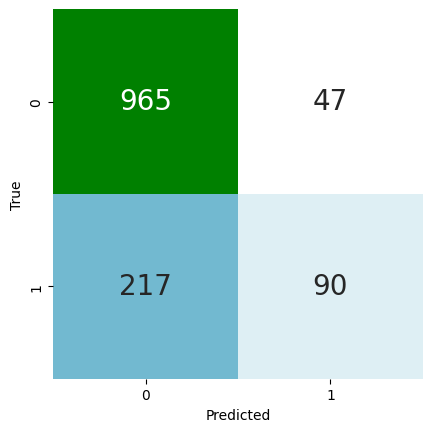

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report.
print('Classification report')
print(classification_report(y_train, y_train_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_train, y_train_pred, clf=model)

In [ ]:
# Funcion para calcular y visualizar la curva ROC.
def curveROC(X,y,model):

    from sklearn.metrics import roc_curve, auc

    y_prob = model.predict_proba(X)
    # calcula fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y, y_prob[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Calcula el mejor threshold
    optimal_idx = np.argmax(tpr * (1-fpr))
    optimal_threshold = thresholds[optimal_idx]

    # Grafica ROC curve
    sns.set(font_scale=1)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr[optimal_idx],tpr[optimal_idx],'o',label='Optimal threshold = %0.2f' % optimal_threshold)
    plt.plot([0, 1], [0, 1], 'k--')# curva de predicciones aleatorias
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

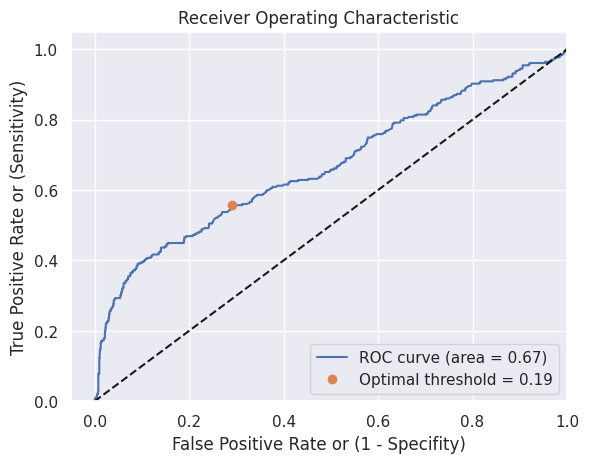

In [ ]:
# Curva ROC.
curveROC(X_train_scal, y_train, model)

#### 3.4.2.- Resultados de test

In [ ]:
# Accuracy y error de test.
y_test_pred = model.predict(X_test_scal)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_err = 1-test_accuracy

print("Accuracy: {} \nTest error: {}".format(test_accuracy, test_err))

Accuracy: 0.7666666666666667 
Test error: 0.23333333333333328


Classification report
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       253
           1       0.50      0.26      0.34        77

    accuracy                           0.77       330
   macro avg       0.65      0.59      0.60       330
weighted avg       0.73      0.77      0.74       330

 
Matriz de confusión


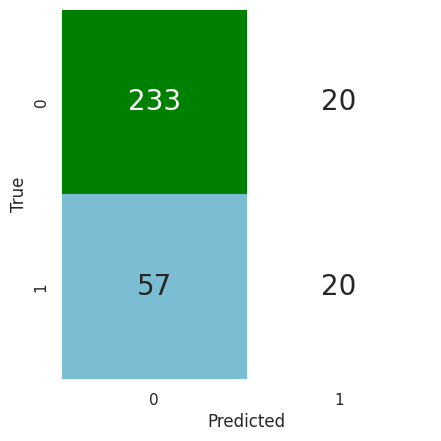

In [ ]:
# Classification report.
print('Classification report')
print(classification_report(y_test, y_test_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_test, y_test_pred, clf=model)

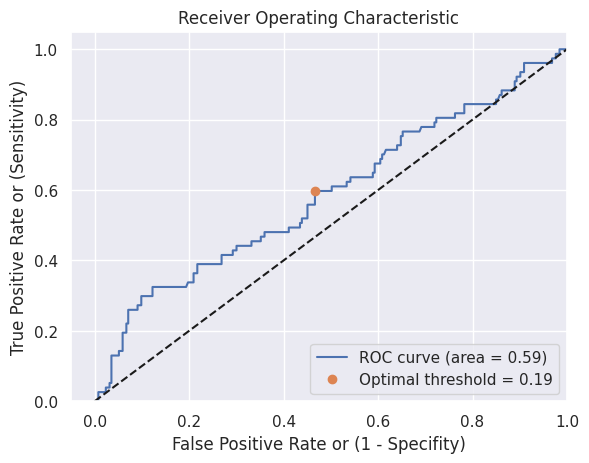

In [ ]:
# Curva ROC.
curveROC(X_test_scal, y_test, model)

## 3.5.- Remuestreo

Se procede a realizar el remuestreo de las clases, para dar un mejor resultado de clasificador

In [ ]:
!pip3 install roc_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.utils import resample
import roc_utils as ru
from sklearn import preprocessing

Con Bootstrapping solo al conjunto de prueba:
Precision promedio =  0.5843233822674281
Accuracy promedio =  0.7865848484848484
Sensibility promedio =  0.30988441133412675
Specificity promedio =  0.9325720800679621


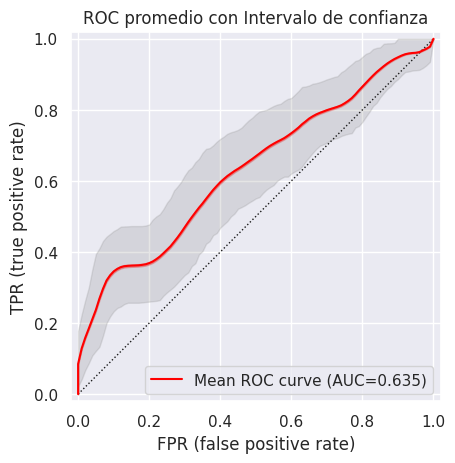

In [ ]:
# Seleccionando el grupo de datos para entreno y el de validación de forma estratificada según la respuesta 'chd'
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify = y, random_state=25)

# Escalando los datos
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajustando el modelo con el único conjunto de entrenamiento
model = SVC(C=100, coef0=-1, gamma=0.01, kernel='sigmoid', probability=True)
model.fit(X_train_scaled, y_train)


# Prediciendo 1000 conjuntos de prueba usando Bootstrapping
accuracy = []
rocs = []
pre = []
acc = []
sen = []
spe = []
n_iterations = 1000
for i in range(n_iterations):
    # Remuestreo con reemplazo
    X_bs, y_bs = resample(X_test_scaled, y_test, replace=True, random_state=i)
    # Predicciones
    y_hat = model.predict(X_bs)

    # Evaluación del modelo (Métricas)
    pre.append(precision_score(y_bs, y_hat))
    acc.append(accuracy_score(y_bs, y_hat))
    sen.append(recall_score(y_bs, y_hat))
    spe.append(recall_score(y_bs, y_hat, pos_label=0))

    # Evaluación del modelo ROC plots
    y_prob = model.predict_proba(X_bs)
    roc = ru.compute_roc(X=y_prob[:,1], y=y_bs, pos_label=True)
    rocs.append(roc)

print('Con Bootstrapping solo al conjunto de prueba:')
print("Precision promedio = ", np.mean(pre))
print("Accuracy promedio = ", np.mean(acc))
print("Sensibility promedio = ", np.mean(sen))
print("Specificity promedio = ", np.mean(spe))

ru.plot_mean_roc(rocs, show_ci=True)
plt.title("ROC promedio con Intervalo de confianza");

# 4.- K-means

El algoritmo K-means es un método de agrupamiento no supervisado utilizado para dividir un conjunto de datos en grupos o clusters. Su objetivo es agrupar los datos de manera que los elementos dentro de un mismo cluster sean similares entre sí y diferentes de los elementos de otros clusters. El algoritmo K-means asigna inicialmente aleatoriamente los centroides de los clusters y luego itera entre dos pasos: asignación y actualización. En el paso de asignación, cada punto de datos se asigna al cluster cuyo centroide está más cercano. En el paso de actualización, los centroides se recalculan como el promedio de los puntos asignados a cada cluster. Estos pasos se repiten hasta que los centroides convergen y se estabilizan, y se obtiene una solución final. El número de clusters K es un parámetro que debe especificarse antes de ejecutar el algoritmo. El K-means es ampliamente utilizado en diversas aplicaciones, como segmentación de clientes, análisis de imágenes y procesamiento de datos.

## 4.1. Regla del codo para encontrar el número de clústers óptimo

In [ ]:
!pip3 install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


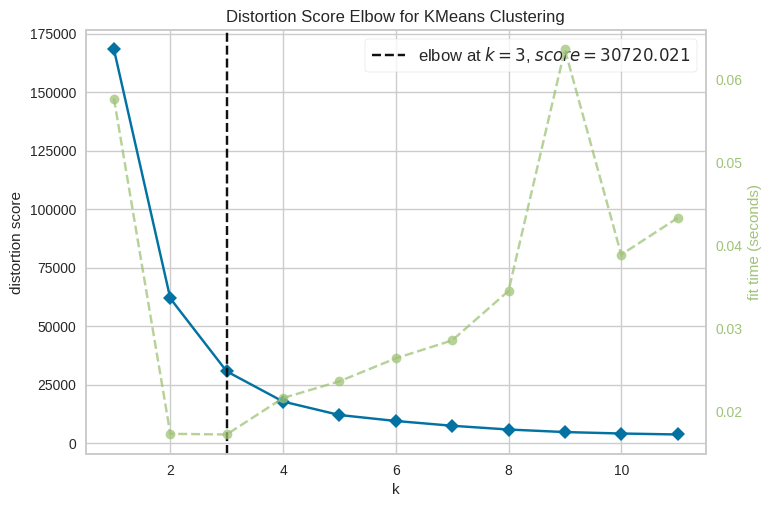

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn import cluster        # Algoritmos de clustering.

model = cluster.KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,12)).fit(X_train)
visualizer.show()

El número óptimo de clústers son 3.

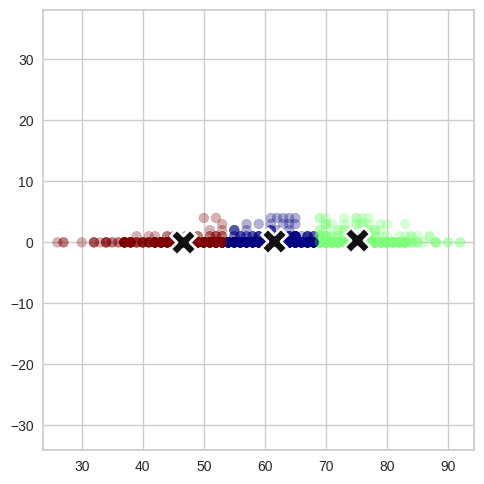

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
kmeans = cluster.KMeans(n_clusters=3, random_state=0)
ax.scatter(X_train[:,0], X_train[:,1], c=np.argmin(kmeans.fit_transform(X_train), axis=1), alpha=.3, cmap='jet')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s=350, c='k', marker='X', linewidths=2, edgecolors='w')
ax.axis('equal')
plt.tight_layout()

## 4.2.- Entrenamiento de un modelo con K-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Entrenar el algoritmo K-means
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# Obtener las etiquetas predichas para los conjuntos de entrenamiento y prueba
y_train_pred = kmeans.labels_
y_test_pred = kmeans.predict(X_test)

In [ ]:
# Calcular la precisión (accuracy) para los conjuntos de entrenamiento y prueba
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Precisión (accuracy) en el conjunto de entrenamiento:", accuracy_train)
print("Precisión (accuracy) en el conjunto de prueba:", accuracy_test)

Precisión (accuracy) en el conjunto de entrenamiento: 0.4564063684609553
Precisión (accuracy) en el conjunto de prueba: 0.48484848484848486


Mediante k-means se obtiene una accuracy de entrenamiento del 36,24%, y una accuracy de test del 36,67%.

# 5.- Aprendizaje con PCA y SVC del proyecto 2

PCA (Análisis de Componentes Principales) es un algoritmo de aprendizaje no supervisado utilizado para reducir la dimensionalidad de un conjunto de datos. Su objetivo es encontrar las direcciones principales, o componentes principales, que expliquen la mayor variabilidad en los datos. Mediante el cálculo de los autovectores y autovalores de la matriz de covarianza o correlación de los datos, el PCA transforma variables correlacionadas en variables no correlacionadas. Al seleccionar un subconjunto de los componentes principales con los autovalores más grandes, se logra reducir la dimensionalidad, eliminando variables menos importantes o redundantes mientras se preserva la mayor parte de la variabilidad original de los datos. El PCA es útil para visualizar datos de alta dimensionalidad, eliminar redundancias y preparar los datos para otras técnicas de aprendizaje automático.


## 5.1.- Buscar mejor número de componentes

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=5)
scores = pca.fit_transform(X_train_scal)

scores_df = pd.DataFrame(data = scores ,
        columns = ["PC"+str(i+1) for i in range(scores.shape[1])])
scores_df['Cluster'] = y_train
scores_df.head()

,PC1,PC2,PC3,PC4,PC5,Cluster
0,-0.527066,1.904088,-1.327240,-1.921520,1.076636,0.0
1,-0.762200,-0.906789,0.317910,0.631744,-0.087370,0.0
2,0.774754,4.428368,-2.504263,-0.324898,0.466051,0.0
3,-0.683651,1.819939,2.832851,-0.579694,0.313086,1.0
4,0.619769,-0.548110,-0.435945,-0.484749,0.925833,0.0


In [ ]:
# Gráfica de la varianza por componente y la acumulada

var_df = pd.DataFrame({'Variance':pca.explained_variance_ratio_})
var_df.index = ["PC"+str(i+1) for i in range(scores.shape[1])]
var_df['Acc variance'] = var_df["Variance"].cumsum()*100
var_df

,Variance,Acc variance
PC1,0.306922,30.692201
PC2,0.200179,50.710133
PC3,0.191894,69.899485
PC4,0.181053,88.004792
PC5,0.119952,100.000000


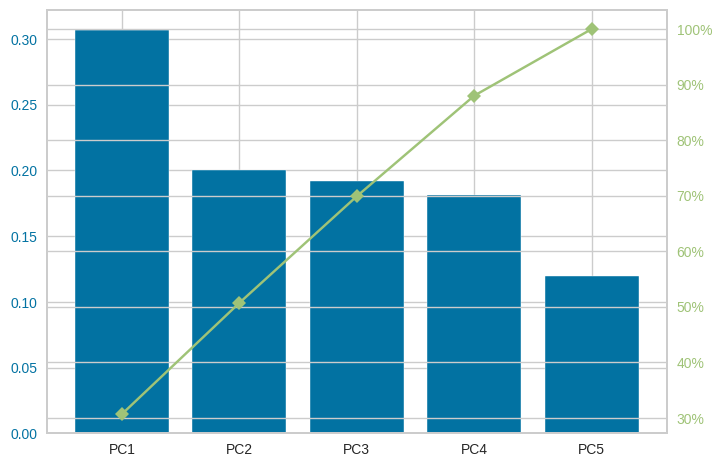

In [ ]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots()
ax.bar(var_df.index, var_df["Variance"], color="C0")
ax2 = ax.twinx()
ax2.plot(var_df.index, var_df["Acc variance"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

Se observa que el codo se produce en la PC4. Por lo tanto, el número óptimo de componentes es 4.

## 5.2.- Re-entrenamiento del SVC del Proyecto 2 con PCA

In [ ]:
# Implementación de PCA (usando valores de X e y escalados)
pca = PCA(n_components=4)  # Specify the number of components you want to keep
X_train_pca = pca.fit_transform(X_train_scal)
X_test_pca = pca.transform(X_test_scal)

In [ ]:
# Creación del modelo SVC.
model = SVC(C=100, coef0=-1, gamma=0.01, kernel='sigmoid', probability=True)

# Entrenamiento.
model.fit(X_train_pca, y_train)

SVC(C=100, coef0=-1, gamma=0.01, kernel='sigmoid', probability=True)

## 5.3.- Evaluación resultados de entrenamiento y test

#### 5.3.1.- Resultados de entrenamiento

In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy y error de entrenamiento.
y_train_pred = model.predict(X_train_pca)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_err = 1-train_accuracy

print("Accuracy: {} \nTrainig error: {}".format(train_accuracy, train_err))

Accuracy: 0.7672479150871873 
Trainig error: 0.23275208491281274


Classification report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1012
           1       0.00      0.00      0.00       307

    accuracy                           0.77      1319
   macro avg       0.38      0.50      0.43      1319
weighted avg       0.59      0.77      0.67      1319

 
Matriz de confusión


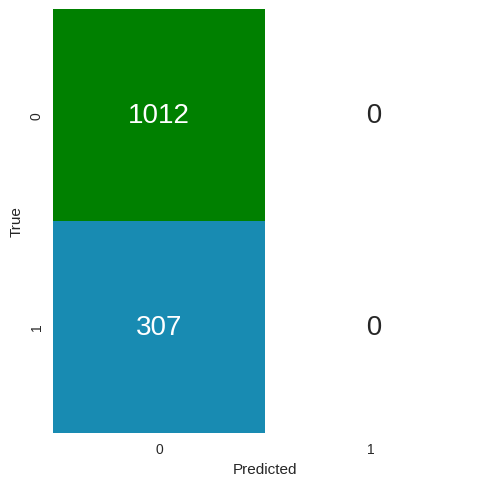

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report.
print('Classification report')
print(classification_report(y_train, y_train_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_train, y_train_pred, clf=model)

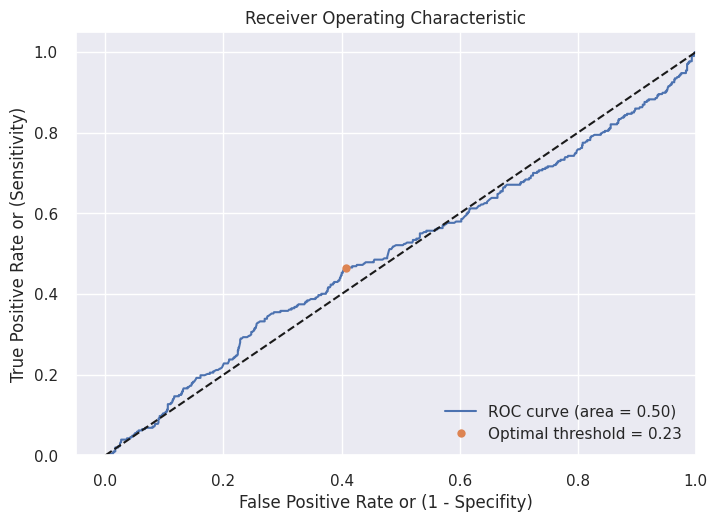

In [ ]:
# Curva ROC.
curveROC(X_train_pca, y_train, model)

#### 5.3.2.- Resultados de test

In [ ]:
# Accuracy y error de test.
y_test_pred = model.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_err = 1-test_accuracy

print("Accuracy: {} \nTest error: {}".format(test_accuracy, test_err))

Accuracy: 0.7666666666666667 
Test error: 0.23333333333333328


Classification report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       253
           1       0.00      0.00      0.00        77

    accuracy                           0.77       330
   macro avg       0.38      0.50      0.43       330
weighted avg       0.59      0.77      0.67       330

 
Matriz de confusión


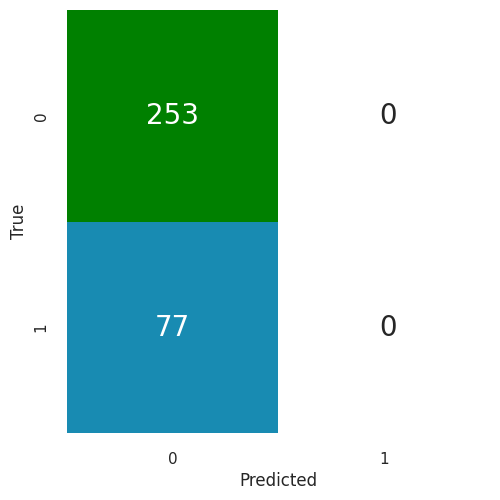

In [ ]:
# Classification report.
print('Classification report')
print(classification_report(y_test, y_test_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_test, y_test_pred, clf=model)

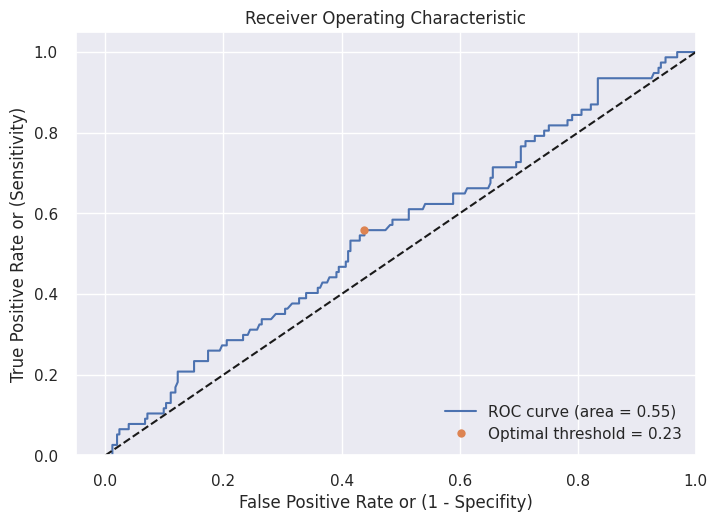

In [ ]:
# Curva ROC.
curveROC(X_test_pca, y_test, model)

## 5.4.- Remuestreo

Con Bootstrapping solo al conjunto de prueba:
Precision promedio =  0.0
Accuracy promedio =  0.7655393939393939
Sensibility promedio =  0.0
Specificity promedio =  1.0


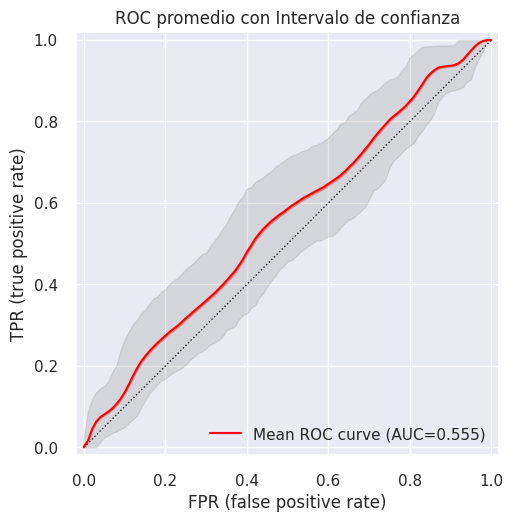

In [ ]:
# Seleccionando el grupo de datos para entreno y el de validación de forma estratificada según la respuesta 'chd'
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify = y, random_state=25)

# Escalando los datos
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implementación de PCA
pca = PCA(n_components=4)  # Specify the number of components you want to keep
X_train_pca = pca.fit_transform(X_train_scal)
X_test_pca = pca.transform(X_test_scal)

# Ajustando el modelo con el único conjunto de entrenamiento
model = SVC(C=100, coef0=-1, gamma=0.01, kernel='sigmoid', probability=True)
model.fit(X_train_pca, y_train)


# Prediciendo 1000 conjuntos de prueba usando Bootstrapping
accuracy = []
rocs = []
pre = []
acc = []
sen = []
spe = []
n_iterations = 1000
for i in range(n_iterations):
    # Remuestreo con reemplazo
    X_bs, y_bs = resample(X_test_pca, y_test, replace=True, random_state=i)
    # Predicciones
    y_hat = model.predict(X_bs)

    # Evaluación del modelo (Métricas)
    pre.append(precision_score(y_bs, y_hat))
    acc.append(accuracy_score(y_bs, y_hat))
    sen.append(recall_score(y_bs, y_hat))
    spe.append(recall_score(y_bs, y_hat, pos_label=0))

    # Evaluación del modelo ROC plots
    y_prob = model.predict_proba(X_bs)
    roc = ru.compute_roc(X=y_prob[:,1], y=y_bs, pos_label=True)
    rocs.append(roc)

print('Con Bootstrapping solo al conjunto de prueba:')
print("Precision promedio = ", np.mean(pre))
print("Accuracy promedio = ", np.mean(acc))
print("Sensibility promedio = ", np.mean(sen))
print("Specificity promedio = ", np.mean(spe))

ru.plot_mean_roc(rocs, show_ci=True)
plt.title("ROC promedio con Intervalo de confianza");

# 6.- Conclusiones

En este último entregable se ha partido de los datos de segundo, rescatando de este el mejor clasificador obtenido, que se trató del SVM realizado a partir de las variables siguientes: *“AGE”*, *“ZSN_A”*, *“OTEK_LANC”*, *“SEX”* y *“ALT_BLOOD”*. Para este clasificador, los resultados de Entrenamiento nos dieron un *“Accuracy”* del 79.84% y un *“Training Error”* del 20.01%, mientras que para el Testeo obtuvimos un *“Accuracy”* del 76.66% y un *“Training Error”* del 23.33%. Por otro lado, al observar las curvas ROC, para el Entrenamiento vemos una área bajo la curva del 67%, un valor razonable, pero, por otro lado, a la hora de hacer el testeo esta baja hasta el 59%, que es un valor aceptable dado que no es menor al 50%, pero se puede tratar de hacer un mejor clasificador.


Así pues, se procedió a hacer un remuestreo de las clases para así obtener un mejor clasificador, esto se hizo mediante la selección de datos, su escalado, el ajuste de modelo como único conjunto de entrenamiento y finalmente la predicción de conjuntos de prueba a través de Bootstrapping. Como resultado, se obtiene un Clasificador con *“Precision”* del 58.43%, *“Accuracy”* del 78.65%, *“Sensibilidad”* del 30.99% y *“Especificidad”* del 93.26%, siendo su área bajo la curva ROC del 63.5%. Analizando los resultados del remuestreo se puede considerar que el clasificador el relativamente mejor al presentado anteriormente.

Como técnica de Visualización de los datos se ha empleado primeramente el *“K-means Clustering”*, para el que primeramente se emplea la regla del Codo, donde se obtiene la menor puntuación de distorsión para k = 3 clusters bien diferenciados que dan como salida del entrenamiento un *“Accuracy”* del 45.64%, mientras que el *“Accuracy”* del Testeo es del 48.48%, valores parecidos entre ellos, por lo tanto se puede decir que no hay overfitting, pero, por otro lado, se desearía una presión mayor.

Por último se ha utlizado un algoritmo de reducción de dimensionalidad, el PCA,como método simple y no paramétrico de extraer información relevante de conjuntos de datos confusos. Como sabemos el PCA se enfoca en encontrar componentes que expliquen la mayor varianza en los datos sin tener en cuenta una variable respuesta específica, es por ello que nuestras matrices de confianza y curvas ROC han salido poco fiables con un *“Accuracy”* del Testeo de 76% pero una *“Precision”* y *“Sensibility”* del 0%, por lo que podemos hablar de un . Lo mas probable es que este fallo haya ocurrido por Correlaciones no lineales, como sablemos el PCA se basa en la matriz de covarianza o en la matriz de correlación de los datos. Si hay correlaciones no lineales entre las variables, el PCA puede no capturar adecuadamente la estructura de los datos y producir resultados inexactos. También puede haber sido posible por dimensionalidad alta, si los datos tienen una dimensionalidad extremadamente alta en comparación con el número de observaciones, el PCA puede no ser efectivo para capturar la variabilidad de manera significativa.

Con esto podemos concluir que el PCA es una técnica exploratoria y sus resultados deben interpretarse con precaución. Dependiendo del contexto y de la naturaleza de los datos, pueden ser necesarias otras técnicas o enfoques complementarios para obtener una comprensión completa de la estructura de los datos.
